<a href="https://colab.research.google.com/github/Ehizson/HDSC-W2023-Projects/blob/main/Team_Optuna_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
%matplotlib inline

#Loading our dataset
drivers = pd.read_csv('/content/driverresponse.csv', index_col='sno')
drivers.head()

,index,stateut,region,regionid,alcintake2014,overspeed2014,overtaking2014,lanejumping2014,wrongside2014,signalavoid2014,asleep2014,othercause2014,alcintake2016,overspeed2016,signalavoid2016,wrongside2016,lanejumping2016,overtaking2016,asleep2016,othercause2016
sno,,,,,,,,,,,,,,,,,,,,
1,0,Andhra Pradesh,south,2,594,12747.0,507,328,668,29,154,1938,128,17286,40,667,325,1024,306,2868
2,1,Arunachal Pradesh,northeast,5,11,16.0,0,0,0,0,0,22,15,45,0,7,11,8,8,18
3,2,Assam,northeast,5,613,4596.0,129,104,156,7,3,628,352,3520,64,334,156,371,3,873
4,3,Bihar,north,1,1680,1496.0,278,236,308,7,72,439,593,2323,8,458,156,573,122,612
5,4,Chhattisgarh,centre,9,335,6720.0,188,313,266,10,81,520,145,6660,62,410,175,467,144,953


In [ ]:
#dropping the index column
drivers.drop(labels='index', axis=1, inplace=True)

#checking for missing values
drivers.isna().sum()

stateut            0
region             0
regionid           0
alcintake2014      0
overspeed2014      1
overtaking2014     0
lanejumping2014    0
wrongside2014      0
signalavoid2014    0
asleep2014         0
othercause2014     0
alcintake2016      0
overspeed2016      0
signalavoid2016    0
wrongside2016      0
lanejumping2016    0
overtaking2016     0
asleep2016         0
othercause2016     0
dtype: int64

In [ ]:
#replacing the missing value in column 'overspeed2014' with the average value of that column
drivers['overspeed2014'].fillna(np.mean(drivers['overspeed2014']), inplace=True)
drivers.isna().sum()

stateut            0
region             0
regionid           0
alcintake2014      0
overspeed2014      0
overtaking2014     0
lanejumping2014    0
wrongside2014      0
signalavoid2014    0
asleep2014         0
othercause2014     0
alcintake2016      0
overspeed2016      0
signalavoid2016    0
wrongside2016      0
lanejumping2016    0
overtaking2016     0
asleep2016         0
othercause2016     0
dtype: int64

In [ ]:
drivers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 1 to 36
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   stateut          36 non-null     object 
 1   region           36 non-null     object 
 2   regionid         36 non-null     int64  
 3   alcintake2014    36 non-null     int64  
 4   overspeed2014    36 non-null     float64
 5   overtaking2014   36 non-null     int64  
 6   lanejumping2014  36 non-null     int64  
 7   wrongside2014    36 non-null     int64  
 8   signalavoid2014  36 non-null     int64  
 9   asleep2014       36 non-null     int64  
 10  othercause2014   36 non-null     int64  
 11  alcintake2016    36 non-null     int64  
 12  overspeed2016    36 non-null     int64  
 13  signalavoid2016  36 non-null     int64  
 14  wrongside2016    36 non-null     int64  
 15  lanejumping2016  36 non-null     int64  
 16  overtaking2016   36 non-null     int64  
 17  asleep2016       3

In [ ]:
drivers.describe()

,regionid,alcintake2014,overspeed2014,overtaking2014,lanejumping2014,wrongside2014,signalavoid2014,asleep2014,othercause2014,alcintake2016,overspeed2016,signalavoid2016,wrongside2016,lanejumping2016,overtaking2016,asleep2016,othercause2016
count,36.000000,36.000000,36.00000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,4.000000,525.444444,5950.60000,312.833333,283.361111,302.000000,37.000000,92.027778,1007.944444,413.722222,7453.916667,124.750000,490.388889,236.472222,823.527778,126.444444,1403.611111
std,2.746426,767.133866,8552.86602,514.513279,462.370115,389.184642,81.196411,234.019472,1780.826436,907.754202,11689.392631,225.198246,754.259534,454.375457,1477.494162,248.883501,1927.404966
min,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.750000,11.750000,83.25000,1.500000,0.000000,6.250000,0.000000,0.000000,19.000000,24.000000,140.500000,0.000000,16.500000,0.000000,16.500000,0.000000,24.750000
50%,4.000000,82.500000,2662.00000,75.500000,86.500000,113.000000,4.500000,5.000000,156.000000,105.000000,2009.500000,9.500000,118.000000,65.500000,175.000000,7.500000,555.000000
75%,5.000000,706.500000,6379.50000,350.000000,316.750000,531.750000,34.500000,133.000000,810.000000,412.500000,10966.500000,117.750000,683.500000,199.750000,1020.250000,127.500000,1753.500000
max,9.000000,3540.000000,29790.00000,2171.000000,1869.000000,1529.000000,451.000000,1393.000000,6874.000000,4633.000000,47055.000000,1004.000000,3209.000000,2367.000000,7155.000000,1121.000000,6915.000000


In [ ]:
# Let's view our categrical column
category_col = drivers.select_dtypes(include=['object', 'category']).columns
print(category_col)

Index(['stateut', 'region'], dtype='object')


In [ ]:
drivers['stateut'].unique(), drivers['region'].unique(), drivers['regionid'].unique()

(array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
        'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
        'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
        'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
        'Nagaland', 'Orissa', 'Punjab', 'Rajasthan', 'Sikkim',
        'Tamil Nadu', 'Telangana', 'Tripura', 'Uttarakhand',
        'Uttar Pradesh', 'West Bengal', 'A & N Islands', 'Chandigarh',
        'D & N Haveli', 'Daman & Diu', 'Delhi', 'Lakshadweep',
        'Puducherry'], dtype=object),
 array(['south', 'northeast', 'north', 'centre', 'west', 'east',
        'northwest', 'southeast', 'southwest'], dtype=object),
 array([2, 5, 1, 9, 4, 3, 6, 7, 8]))

In [ ]:
# Let's view our numerical column
numerical_col = [col for col in drivers.columns if col not in category_col]
print(numerical_col)

['regionid', 'alcintake2014', 'overspeed2014', 'overtaking2014', 'lanejumping2014', 'wrongside2014', 'signalavoid2014', 'asleep2014', 'othercause2014', 'alcintake2016', 'overspeed2016', 'signalavoid2016', 'wrongside2016', 'lanejumping2016', 'overtaking2016', 'asleep2016', 'othercause2016']


In [ ]:
drivers.groupby(['region']).sum()

,regionid,alcintake2014,overspeed2014,overtaking2014,lanejumping2014,wrongside2014,signalavoid2014,asleep2014,othercause2014,alcintake2016,overspeed2016,signalavoid2016,wrongside2016,lanejumping2016,overtaking2016,asleep2016,othercause2016
region,,,,,,,,,,,,,,,,,
centre,45,6091,39279.0,2283,2506,2508,234,491,9066,5228,53928,639,2600,1167,6446,919,8218
east,9,28,3886.0,281,186,235,107,49,1384,494,1900,90,110,53,184,29,6954
north,9,5481,22321.6,1122,1121,1808,239,498,3193,6404,23124,1651,4731,2377,6785,1722,11353
northeast,30,748,4731.0,129,104,182,7,3,771,498,3824,64,400,167,442,41,957
northwest,6,915,11395.0,102,1157,656,2,176,1803,673,13358,0,981,217,1345,222,5012
south,10,4325,85782.0,4975,3830,4220,683,1868,14015,1270,131206,1687,6120,3105,11444,1078,12932
southeast,7,25,94.0,7,20,11,0,0,0,27,124,2,31,0,15,0,39
southwest,8,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
west,20,1303,46732.0,2363,1277,1252,60,228,6054,300,40877,358,2681,1427,2986,541,5065


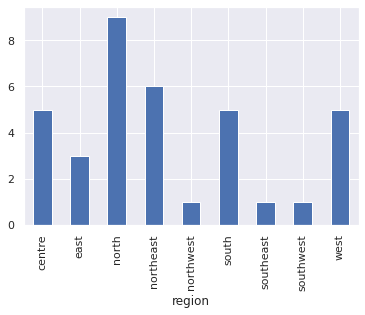

In [ ]:
# Let's know how many states are in each region
drivers.groupby('region')['stateut'].count().plot(kind='bar')

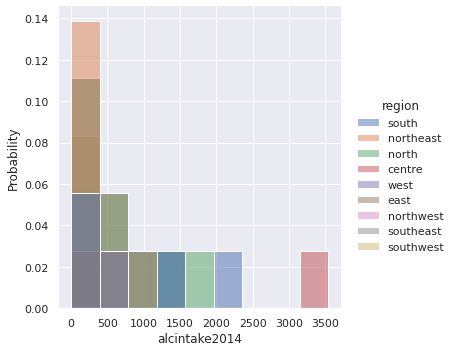

In [ ]:
sns.displot(data=drivers, x='alcintake2014', hue='region', stat='probability')

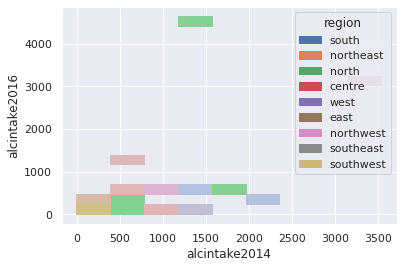

In [ ]:
sns.histplot(data=drivers, x='alcintake2014',y='alcintake2016', hue='region')

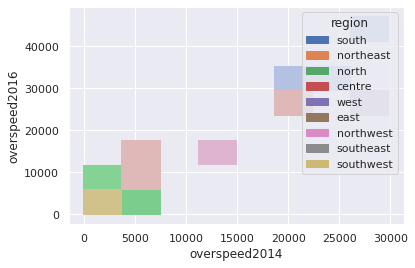

In [ ]:
sns.histplot(data=drivers, x='overspeed2014',y='overspeed2016', hue='region')

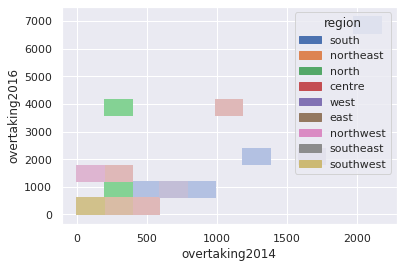

In [ ]:
sns.histplot(data=drivers, x='overtaking2014',y='overtaking2016', hue='region')

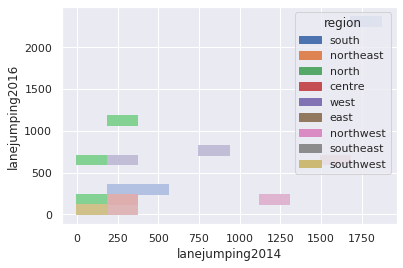

In [ ]:
sns.histplot(data=drivers, x='lanejumping2014',y='lanejumping2016', hue='region')

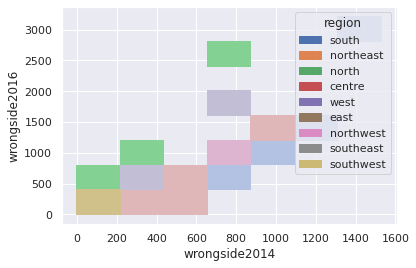

In [ ]:
sns.histplot(data=drivers, x='wrongside2014',y='wrongside2016', hue='region')

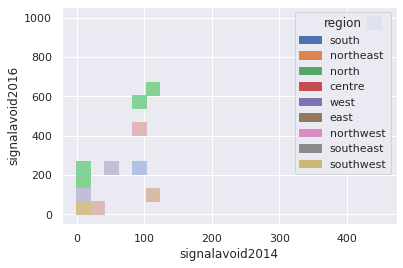

In [ ]:
sns.histplot(data=drivers, x='signalavoid2014',y='signalavoid2016', hue='region')

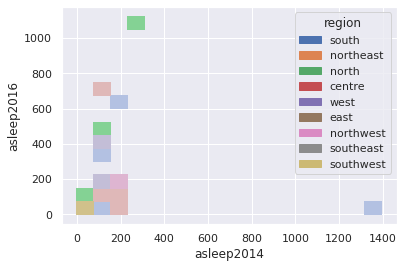

In [ ]:
sns.histplot(data=drivers, x='asleep2014',y='asleep2016', hue='region')

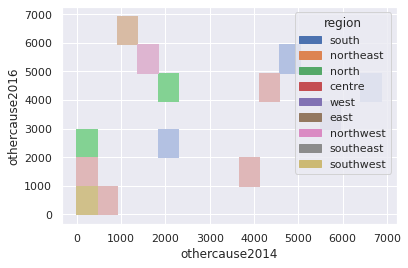

In [ ]:
sns.histplot(data=drivers, x='othercause2014',y='othercause2016', hue='region')

In [ ]:
# importing the encoder module
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
for i in category_col: 
  drivers[i] = le.fit_transform(drivers[i])

In [ ]:
drivers.head()

,stateut,region,regionid,alcintake2014,overspeed2014,overtaking2014,lanejumping2014,wrongside2014,signalavoid2014,asleep2014,othercause2014,alcintake2016,overspeed2016,signalavoid2016,wrongside2016,lanejumping2016,overtaking2016,asleep2016,othercause2016
sno,,,,,,,,,,,,,,,,,,,
1,Andhra Pradesh,south,2,594,12747.0,507,328,668,29,154,1938,128,17286,40,667,325,1024,306,2868
2,Arunachal Pradesh,northeast,5,11,16.0,0,0,0,0,0,22,15,45,0,7,11,8,8,18
3,Assam,northeast,5,613,4596.0,129,104,156,7,3,628,352,3520,64,334,156,371,3,873
4,Bihar,north,1,1680,1496.0,278,236,308,7,72,439,593,2323,8,458,156,573,122,612
5,Chhattisgarh,centre,9,335,6720.0,188,313,266,10,81,520,145,6660,62,410,175,467,144,953


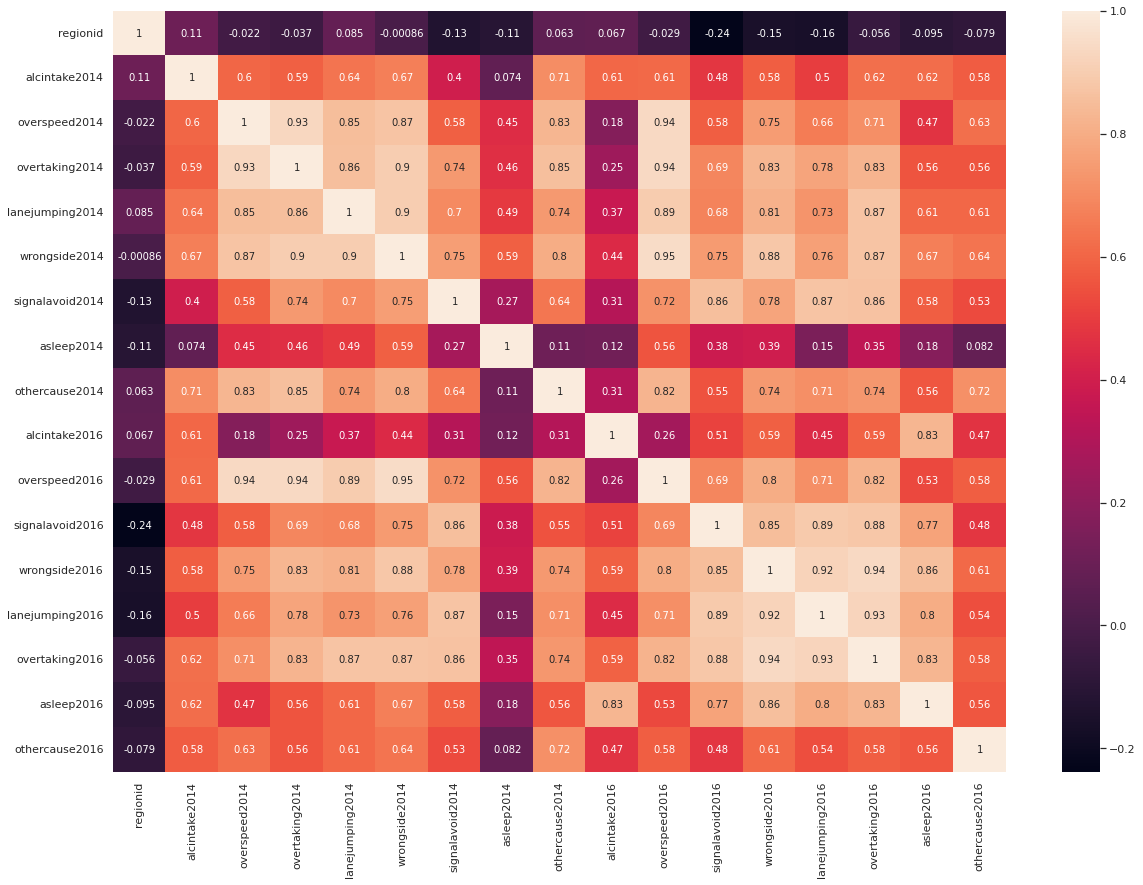

In [ ]:
# Let's visualize the correlations between the features
fig, ax = plt.subplots(figsize=(20,14))
ax = sns.heatmap(drivers.corr(), annot=True)

In [ ]:
pd.DataFrame(drivers.groupby(['alcintake2014', 'alcintake2016'])['stateut'].sum())

stateut
alcintake2014 alcintake2016                   
0             0                    Lakshadweep
              7                    Daman & Diu
              71                       Manipur
              462                  West Bengal
1             0                   D & N Haveli
8             12                        Sikkim
9             3                            Goa
11            9                     Chandigarh
              15             Arunachal Pradesh
12            5                        Tripura
16            27                       Mizoram
25            27                 A & N Islands
              35                     Meghalaya
35            133                       Kerala
42            64                       Gujarat
51            164                        Delhi
73            82                    Puducherry
74            72              Himachal Pradesh
91            13                      Nagaland
335           145                 Chhattisgarh
388           47               Jammu & Kashmir
442           317                       Punjab
508           40                   Uttarakhand
594           128               Andhra Pradesh
611           543                    Jharkhand
613           352                        Assam
637           1255                      Orissa
915           673                    Rajasthan
968           202                    Telangana
1095          529                      Haryana
1232          4633               Uttar Pradesh
1251          226                  Maharashtra
1416          531                   Tamil Nadu
1680          593                        Bihar
2207          396                    Karnataka
3540          3083              Madhya Pradesh

In [ ]:
drivers.groupby(['overspeed2014', 'overspeed2016'])['stateut'].sum()

overspeed2014  overspeed2016
0.0            57                         Manipur
1.0            0                      Lakshadweep
16.0           45               Arunachal Pradesh
21.0           8                     D & N Haveli
               29                     Daman & Diu
28.0           45                          Sikkim
40.0           146                      Meghalaya
48.0           14                         Mizoram
51.0           11                        Nagaland
94.0           124                  A & N Islands
               736                    Uttarakhand
160.0          380                     Chandigarh
250.0          1297                    Puducherry
499.0          413                        Tripura
1496.0         2323                         Bihar
1627.0         652                      Jharkhand
2253.0         2517                        Punjab
2561.0         10184                Uttar Pradesh
2763.0         516               Himachal Pradesh
2859.0         2428  

In [ ]:
drivers.groupby(['overtaking2014', 'overtaking2016'])['stateut'].sum()

overtaking2014  overtaking2016
0               0                 MeghalayaNagalandLakshadweep
                5                                 D & N Haveli
                8                            Arunachal Pradesh
                17                                      Sikkim
                46                                     Manipur
                56                                     Tripura
                211                                      Delhi
2               2                                  Daman & Diu
7               15                               A & N Islands
15              132                                Uttarakhand
21              195                           Himachal Pradesh
24              6                                      Mizoram
33              80                                         Goa
60              585                                     Punjab
67              18                             Jammu & Kashmir
68              155     

In [ ]:
drivers.groupby(['lanejumping2014', 'lanejumping2016'])['stateut'].sum()

lanejumping2014  lanejumping2016
0                0                  ManipurMeghalayaMizoramNagalandSikkimD & N Hav...
                 11                                                 Arunachal Pradesh
                 129                                                            Delhi
2                0                                                        Daman & Diu
7                0                                                            Tripura
8                0                                                                Goa
10               78                                                  Himachal Pradesh
20               0                                                      A & N Islands
25               5                                                         Chandigarh
29               2                                                    Jammu & Kashmir
69               0                                                        Uttarakhand
104              156 

In [ ]:
drivers.groupby(['wrongside2014', 'wrongside2016'])['stateut'].sum()

wrongside2014  wrongside2016
0              0                MeghalayaLakshadweep
               5                        D & N Haveli
               7                   Arunachal Pradesh
               20                             Sikkim
               39                            Manipur
               131                             Delhi
1              2                  MizoramDaman & Diu
8              90                         Puducherry
11             31                      A & N Islands
17             17                         Chandigarh
26             0                            Nagaland
29             15                            Tripura
43             21                   Himachal Pradesh
58             14                    Jammu & Kashmir
61             19                                Goa
99             105                       Uttarakhand
127            512                            Punjab
156            334                             Assam
205            93

In [ ]:
drivers.groupby(['signalavoid2014', 'signalavoid2016'])['stateut'].sum()

signalavoid2014  signalavoid2016
0                0                  Arunachal PradeshGoaHimachal PradeshJammu & Ka...
                 2                                                      A & N Islands
                 10                                                        Chandigarh
                 229                                                            Delhi
1                0                                                            Tripura
                 37                                                         Jharkhand
2                0                                                          Rajasthan
7                0                                                        Uttarakhand
                 8                                                              Bihar
                 64                                                             Assam
9                97                                                       Maharashtra
10               62  

In [ ]:
drivers.groupby(['asleep2014', 'asleep2016'])['stateut'].sum()

asleep2014  asleep2016
0           0             Himachal PradeshJammu & KashmirMeghalayaNagala...
            1                                                   Daman & Diu
            2                                                  D & N Haveli
            7                                                       Mizoram
            8                                             Arunachal Pradesh
            30                                                      Manipur
3           3                                                         Assam
4           4                                                           Goa
6           0                                                     Jharkhand
15          0                                                    Puducherry
34          17                                                       Punjab
49          22                                                  West Bengal
72          122                                                  

In [ ]:
drivers.groupby(['othercause2014', 'othercause2016'])['stateut'].sum()

othercause2014  othercause2016
0               0                 MeghalayaLakshadweep
                28                             Tripura
                39                       A & N Islands
                66                             Manipur
                1392                  Himachal Pradesh
                2838                             Delhi
7               7                           Chandigarh
10              27                         Daman & Diu
22              18                   Arunachal Pradesh
25              0                            Jharkhand
28              11                             Mizoram
51              0                               Sikkim
65              4                         D & N Haveli
70              0                             Nagaland
72              70                         Uttarakhand
86              50                              Kerala
153             498                             Punjab
159             247               